In [1]:
import pandas as pd

# OrderList
Contains historical records of orders, their respective routing, and costs.

In [74]:
df_OrderList= pd.read_csv("OrderList.csv")
df_OrderList.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1447296447,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1447158015,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1447138899,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1447363528,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1447363981,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [75]:
df_OrderList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              9215 non-null   int64  
 1   Order Date            9215 non-null   object 
 2   Origin Port           9215 non-null   object 
 3   Carrier               9215 non-null   object 
 4   TPT                   9215 non-null   int64  
 5   Service Level         9215 non-null   object 
 6   Ship ahead day count  9215 non-null   int64  
 7   Ship Late Day count   9215 non-null   int64  
 8   Customer              9215 non-null   object 
 9   Product ID            9215 non-null   int64  
 10  Plant Code            9215 non-null   object 
 11  Destination Port      9215 non-null   object 
 12  Unit quantity         9215 non-null   int64  
 13  Weight                9215 non-null   float64
dtypes: float64(1), int64(6), object(7)
memory usage: 1008.0+ KB


In [76]:
df_OrderList.describe()

,Order ID,TPT,Ship ahead day count,Ship Late Day count,Product ID,Unit quantity,Weight
count,9.215000e+03,9215.000000,9215.000000,9215.000000,9.215000e+03,9215.000000,9215.000000
mean,1.447274e+09,1.717743,1.852306,0.039935,1.680536e+06,3202.747151,19.871688
std,8.381629e+04,0.630500,1.922302,0.319625,1.526593e+04,15965.622260,66.569064
min,1.447126e+09,0.000000,0.000000,0.000000,1.613321e+06,235.000000,0.000000
25%,1.447197e+09,1.000000,0.000000,0.000000,1.669702e+06,330.000000,1.407430
50%,1.447276e+09,2.000000,3.000000,0.000000,1.683636e+06,477.000000,4.440000
75%,1.447346e+09,2.000000,3.000000,0.000000,1.689554e+06,1275.500000,13.325673
max,1.447425e+09,4.000000,6.000000,6.000000,1.702654e+06,561847.000000,2338.405126


In [77]:
df_OrderList.isnull().sum()

Order ID                0
Order Date              0
Origin Port             0
Carrier                 0
TPT                     0
Service Level           0
Ship ahead day count    0
Ship Late Day count     0
Customer                0
Product ID              0
Plant Code              0
Destination Port        0
Unit quantity           0
Weight                  0
dtype: int64

In [78]:
df_OrderList.columns

Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')

In [79]:
df_OrderList.dtypes

Order ID                  int64
Order Date               object
Origin Port              object
Carrier                  object
TPT                       int64
Service Level            object
Ship ahead day count      int64
Ship Late Day count       int64
Customer                 object
Product ID                int64
Plant Code               object
Destination Port         object
Unit quantity             int64
Weight                  float64
dtype: object

'Order date' should be converted to date time format




In [84]:
df_OrderList['Order Date'] = pd.to_datetime(df_OrderList['Order Date'])
df_OrderList['Plant Code'] = df_OrderList['Plant Code'].astype(str)
df_OrderList['Product ID'] = df_OrderList['Product ID'].astype(str)

In [81]:
df_OrderList.dtypes

Order ID                         int64
Order Date              datetime64[ns]
Origin Port                     object
Carrier                         object
TPT                              int64
Service Level                   object
Ship ahead day count             int64
Ship Late Day count              int64
Customer                        object
Product ID                       int64
Plant Code                      object
Destination Port                object
Unit quantity                    int64
Weight                         float64
dtype: object

In [82]:
# Get unique values for each column in df_OrderList individually
unique_values_df_OrderList = {col: df_OrderList[col].unique() for col in ['Origin Port', 'Carrier', 'Plant Code', 'Destination Port']}
print(unique_values_df_OrderList)


{'Origin Port': array(['PORT09', 'PORT04', 'PORT05'], dtype=object), 'Carrier': array(['V44_3', 'V444_0', 'V444_1'], dtype=object), 'Plant Code': array(['PLANT16', 'PLANT03', 'PLANT08', 'PLANT04', 'PLANT12', 'PLANT09',
       'PLANT13'], dtype=object), 'Destination Port': array(['PORT09'], dtype=object)}


OrderList Deatials are avaialble for Only 'PLANT16', 'PLANT03', 'PLANT08', 'PLANT04', 'PLANT12', 'PLANT09' and Carriers 'V44_3', 'V444_0', 'V444_1'

# FreightRates
Lists available couriers, their rates based on weight gaps for specific lanes, and estimated shipping times.

In [108]:

df_FreightRates= pd.read_csv("FreightRates.csv")
df_FreightRates.head()

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,$ 43.23,$ 0.71,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,$ 43.23,$ 0.75,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,$ 43.23,$ 0.79,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,$ 43.23,$ 0.83,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,$ 43.23,$ 1.06,AIR,2,V88888888_0


In [12]:
df_FreightRates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carrier       1540 non-null   object 
 1   orig_port_cd  1540 non-null   object 
 2   dest_port_cd  1540 non-null   object 
 3   minm_wgh_qty  1540 non-null   float64
 4   max_wgh_qty   1540 non-null   object 
 5   svc_cd        1540 non-null   object 
 6   minimum cost  1540 non-null   object 
 7   rate          1540 non-null   object 
 8   mode_dsc      1540 non-null   object 
 9   tpt_day_cnt   1540 non-null   int64  
 10  Carrier type  1540 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 132.5+ KB


In [13]:
df_FreightRates.describe()

,minm_wgh_qty,tpt_day_cnt
count,1540.000000,1540.000000
mean,155.886637,2.186364
std,475.952049,2.000895
min,0.000000,0.000000
25%,15.010000,1.000000
50%,41.010000,2.000000
75%,67.229614,2.000000
max,10000.000000,14.000000


In [14]:
df_FreightRates.isnull().sum()

Carrier         0
orig_port_cd    0
dest_port_cd    0
minm_wgh_qty    0
max_wgh_qty     0
svc_cd          0
minimum cost    0
rate            0
mode_dsc        0
tpt_day_cnt     0
Carrier type    0
dtype: int64

In [15]:
df_FreightRates.dtypes

Carrier          object
orig_port_cd     object
dest_port_cd     object
minm_wgh_qty    float64
max_wgh_qty      object
svc_cd           object
minimum cost     object
rate             object
mode_dsc         object
tpt_day_cnt       int64
Carrier type     object
dtype: object

As we can see the "minimum cost" and "
rat" are in object datatype and we will convert it to an integer         

In [109]:

df_FreightRates['minimum cost'] = df_FreightRates['minimum cost'].str.replace('$', '', regex=False).str.strip().astype(float)
# Convert to int 
df_FreightRates['minimum cost'] = df_FreightRates['minimum cost'].astype(int)
df_FreightRates['rate'] = df_FreightRates['rate'].str.replace('$', '', regex=False).str.strip().astype(float)
df_FreightRates['minm_wgh_qty'] = pd.to_numeric(df_FreightRates['minm_wgh_qty'], errors='coerce')
df_FreightRates['max_wgh_qty'] = pd.to_numeric(df_FreightRates['max_wgh_qty'], errors='coerce')


In [110]:
df_FreightRates.head(2)

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43,0.71,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43,0.75,AIR,2,V88888888_0


In [19]:
# Get unique values for each column individually
unique_values = {col: df_FreightRates[col].unique() for col in ['Carrier', 'orig_port_cd', 'dest_port_cd', 'svc_cd', 'mode_dsc', 'Carrier type']}
print(unique_values)


{'Carrier': array(['V444_6', 'V444_8', 'V444_9', 'V444_2', 'V444_1', 'V444_0',
       'V444_5', 'V444_4', 'V444_7'], dtype=object), 'orig_port_cd': array(['PORT08', 'PORT10', 'PORT09', 'PORT11', 'PORT04', 'PORT02',
       'PORT03', 'PORT07', 'PORT05', 'PORT06'], dtype=object), 'dest_port_cd': array(['PORT09'], dtype=object), 'svc_cd': array(['DTD', 'DTP'], dtype=object), 'mode_dsc': array(['AIR   ', 'GROUND'], dtype=object), 'Carrier type': array(['V88888888_0', 'V888888883_1'], dtype=object)}


# PlantPorts
Specifies allowed links between warehouses and shipping ports.


In [20]:

df_PlantPorts= pd.read_csv("PlantPorts.csv")
df_PlantPorts.head()

,Plant Code,Port
0,PLANT01,PORT01
1,PLANT01,PORT02
2,PLANT02,PORT03
3,PLANT03,PORT04
4,PLANT04,PORT05


In [21]:
df_PlantPorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Plant Code  22 non-null     object
 1   Port        22 non-null     object
dtypes: object(2)
memory usage: 484.0+ bytes


In [22]:
df_PlantPorts.describe()

,Plant Code,Port
count,22,22
unique,19,11
top,PLANT01,PORT04
freq,2,7


In [23]:
df_PlantPorts.isnull().sum()

Plant Code    0
Port          0
dtype: int64

In [24]:
df_PlantPorts.dtypes

Plant Code    object
Port          object
dtype: object

# ProductsPerPlant
Lists supported warehouse-product combinations.


In [25]:
df_ProductsPerPlant= pd.read_csv("ProductsPerPlant.csv")
df_ProductsPerPlant.head()

,Plant Code,Product ID
0,PLANT15,1698815
1,PLANT17,1664419
2,PLANT17,1664426
3,PLANT17,1672826
4,PLANT17,1674916


In [26]:
df_ProductsPerPlant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Plant Code  2036 non-null   object
 1   Product ID  2036 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.9+ KB


In [27]:
df_ProductsPerPlant.isnull().sum()

Plant Code    0
Product ID    0
dtype: int64

In [28]:
print(df_ProductsPerPlant['Plant Code'].nunique())
print(df_ProductsPerPlant['Plant Code'].unique())

19
['PLANT15' 'PLANT17' 'PLANT18' 'PLANT05' 'PLANT02' 'PLANT01' 'PLANT06'
 'PLANT10' 'PLANT07' 'CND9' 'PLANT14' 'PLANT16' 'PLANT12' 'PLANT11'
 'PLANT09' 'PLANT03' 'PLANT13' 'PLANT08' 'PLANT04']


In [29]:
df_ProductsPerPlant['Product ID'].nunique()

1540

# VmiCustomers
Lists special cases where a warehouse is only allowed to support specific customers.

In [30]:

df_VmiCustomers= pd.read_csv("VmiCustomers.csv")
df_VmiCustomers.head()

,Plant Code,Customers
0,PLANT02,V5555555555555_16
1,PLANT02,V555555555555555_29
2,PLANT02,V555555555_3
3,PLANT02,V55555555555555_8
4,PLANT02,V55555555_9


In [123]:
df_VmiCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Plant Code  14 non-null     object
 1   Customers   14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [32]:
df_VmiCustomers.describe()

,Plant Code,Customers
count,14,14
unique,4,10
top,PLANT02,V55555_10
freq,7,3


# WhCapacities
Specifies the maximum number of orders that can be processed by each warehouse per day.

In [125]:
df_WhCapacities= pd.read_csv("WhCapacities.csv")
df_WhCapacities.head()

,Plant ID,Daily Capacity
0,PLANT15,11
1,PLANT17,8
2,PLANT18,111
3,PLANT05,385
4,PLANT02,138


In [37]:
# Strip trailing spaces from column names
df_WhCapacities.columns = df_WhCapacities.columns.str.strip()


In [38]:
df_WhCapacities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Plant ID        19 non-null     object
 1   Daily Capacity  19 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 436.0+ bytes


In [39]:
df_WhCapacities.describe()

,Daily Capacity
count,19.000000
mean,304.789474
std,323.513280
min,7.000000
25%,31.500000
50%,209.000000
75%,473.500000
max,1070.000000


# WhCosts
Lists the cost associated with storing products in each warehouse.


In [131]:
df_WhCosts= pd.read_csv("WhCosts.csv")
df_WhCosts.head()

,WH,Cost/unit
0,PLANT15,1.42
1,PLANT17,0.43
2,PLANT18,2.04
3,PLANT05,0.49
4,PLANT02,0.48


In [44]:
df_WhCosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WH         19 non-null     object 
 1   Cost/unit  19 non-null     float64
dtypes: float64(1), object(1)
memory usage: 436.0+ bytes


In [45]:
df_WhCosts.describe()

,Cost/unit
count,19.000000
mean,0.724737
std,0.495820
min,0.370000
25%,0.475000
50%,0.520000
75%,0.635000
max,2.040000


# Exploratory Data Analysis(EDA)

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


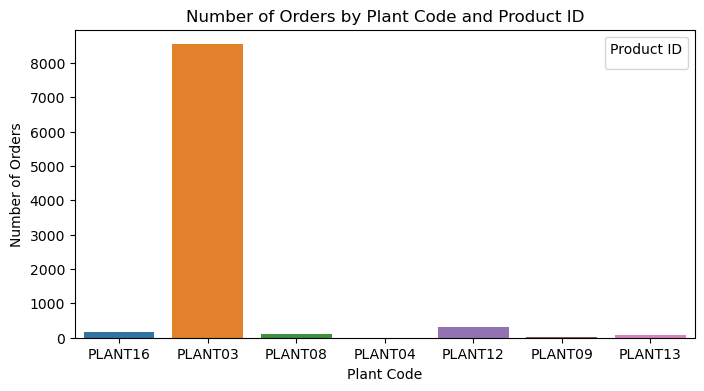

In [87]:
# Bar plot: Count of orders per Plant Code
plt.figure(figsize=(8, 4))
sns.countplot(x='Plant Code', data=df_OrderList)
plt.title('Number of Orders by Plant Code and Product ID')
plt.xlabel('Plant Code')
plt.ylabel('Number of Orders')
plt.legend(title='Product ID')
plt.show()

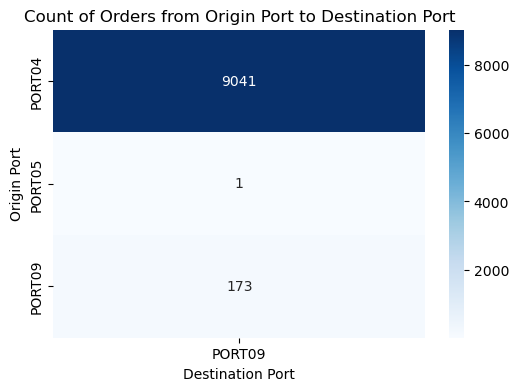

In [94]:
pivot_table = df_OrderList.pivot_table(index='Origin Port', columns='Destination Port', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap='Blues', cbar=True, fmt='d')
plt.title('Count of Orders from Origin Port to Destination Port')
plt.xlabel('Destination Port')
plt.ylabel('Origin Port')
plt.show()

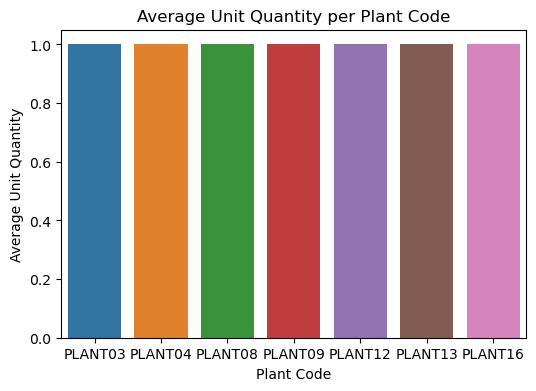

In [97]:
# Calculate the average of Unit quantity per Plant Code
average_unit_quantity = df_OrderList.groupby('Plant Code')['Unit quantity'].mean().reset_index()

# Rename columns for clarity
average_unit_quantity.columns = ['Plant Code', 'Average Unit Quantity']

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.countplot(x='Plant Code', data=average_unit_quantity)
plt.title('Average Unit Quantity per Plant Code')
plt.xlabel('Plant Code')
plt.ylabel('Average Unit Quantity')
plt.show()

In [112]:
# Calculate the average of minm_wgh_qty and max_wgh_qty
averages = df_FreightRates[['minm_wgh_qty', 'max_wgh_qty']].mean().reset_index()
averages

,index,0
0,minm_wgh_qty,155.886637
1,max_wgh_qty,4570.091943


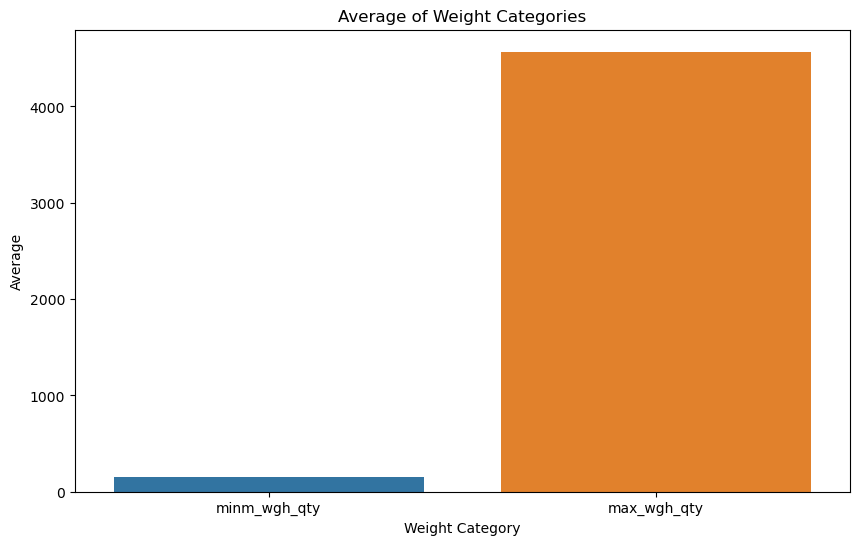

In [114]:
# Rename columns for clarity
averages.columns = ['Weight Category', 'Average']

# Prepare data for plotting
plot_data = averages.melt(id_vars='Weight Category', var_name='Category', value_name='Avg_Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Weight Category', y='Avg_Value', data=plot_data)
plt.title('Average of Weight Categories')
plt.xlabel('Weight Category')
plt.ylabel('Average')
plt.show()

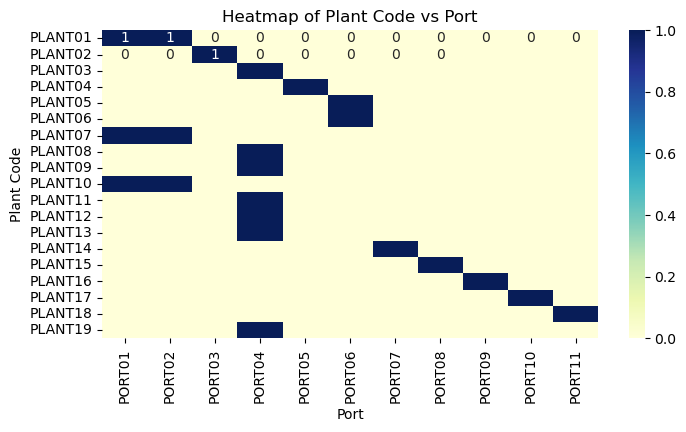

In [117]:
# Aggregate data by count
heatmap_data = pd.crosstab(df_PlantPorts['Plant Code'], df_PlantPorts['Port'])

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Plant Code vs Port')
plt.xlabel('Port')
plt.ylabel('Plant Code')
plt.show()


In [118]:
# Count unique Product IDs for each Plant Code
unique_product_counts = df_ProductsPerPlant.groupby('Plant Code')['Product ID'].nunique().reset_index()
unique_product_counts.columns = ['Plant Code', 'Unique Product Count']

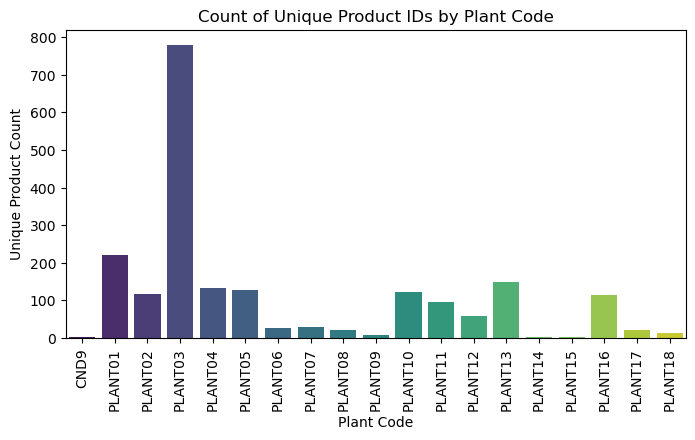

In [120]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Plant Code', y='Unique Product Count', data=unique_product_counts, palette='viridis')
plt.title('Count of Unique Product IDs by Plant Code')
plt.xlabel('Plant Code')
plt.ylabel('Unique Product Count')
plt.xticks(rotation=90)

plt.show()

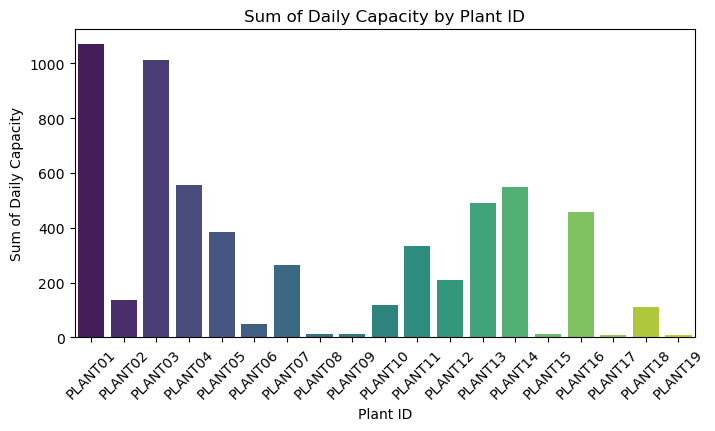

In [128]:
# Aggregate the data
capacity_sum = df_WhCapacities.groupby('Plant ID')['Daily Capacity '].sum().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Plant ID', y='Daily Capacity ', data=capacity_sum, palette='viridis')
plt.title('Sum of Daily Capacity by Plant ID')
plt.xlabel('Plant ID')
plt.ylabel('Sum of Daily Capacity')

# Rotate x-axis 
plt.xticks(rotation=45)

plt.show()

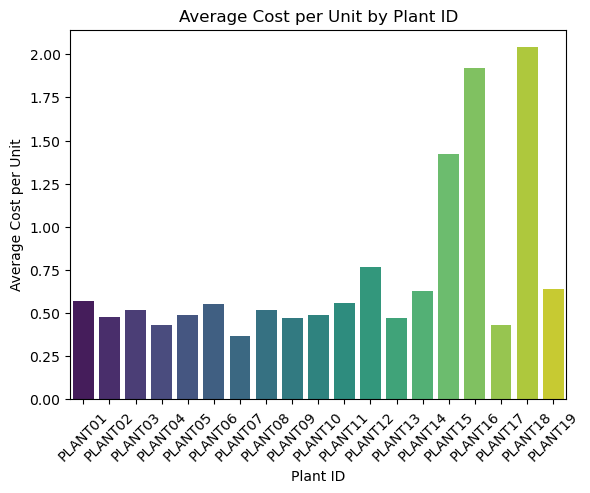

In [135]:

# Calculate the average cost per unit by Plant ID
average_cost_per_unit = df_WhCosts.groupby('Plant ID')['Cost/unit'].mean().reset_index()
average_cost_per_unit.columns = ['Plant ID', 'Average Cost per Unit']

# Plot
sns.barplot(x='Plant ID', y='Average Cost per Unit', data=average_cost_per_unit, palette='viridis')
plt.title('Average Cost per Unit by Plant ID')
plt.xlabel('Plant ID')
plt.ylabel('Average Cost per Unit')
plt.xticks(rotation=45)
plt.show()


# 1.Historical Cost Calculation:


In [140]:
# Rename column 'Plant Code' from df_OrderList  for consistency
df_OrderList = df_OrderList.rename(columns={'Plant Code': 'Plant ID'})
df_WhCosts = df_WhCosts.rename(columns ={'WH':'Plant ID' })

In [141]:
# Merge the dataframes on 'WH' and 'Product ID'
merged_df = pd.merge(df_OrderList, df_WhCosts, on='Plant ID')

In [142]:
# Calculate the total historical cost
merged_df['Total Cost'] = merged_df['Unit quantity'] * merged_df['Cost/unit']

# Sum up the total costs to get the overall historical cost of order fulfillment
total_historical_cost = merged_df['Total Cost'].sum()

print(f"Total Historical Cost of Order Fulfillment: {total_historical_cost}")

Total Historical Cost of Order Fulfillment: 15704718.23


# 2.Capacity Utilization:


In [143]:

# Group the orders by warehouse and date, and count the number of orders per day
daily_order_counts = df_OrderList.groupby(['Plant ID', 'Order Date']).size().reset_index(name='Daily Orders')
daily_order_counts

,Plant ID,Order Date,Daily Orders
0,PLANT03,2013-05-26,8541
1,PLANT04,2013-05-26,1
2,PLANT08,2013-05-26,102
3,PLANT09,2013-05-26,12
4,PLANT12,2013-05-26,300
5,PLANT13,2013-05-26,86
6,PLANT16,2013-05-26,173


In [144]:

# Merge the daily order counts with warehouse capacities
merged_df = pd.merge(daily_order_counts, df_WhCapacities, on='Plant ID')
merged_df


,Plant ID,Order Date,Daily Orders,Daily Capacity
0,PLANT03,2013-05-26,8541,1013
1,PLANT04,2013-05-26,1,554
2,PLANT08,2013-05-26,102,14
3,PLANT09,2013-05-26,12,11
4,PLANT12,2013-05-26,300,209
5,PLANT13,2013-05-26,86,490
6,PLANT16,2013-05-26,173,457


In [147]:

# Calculate capacity utilization
merged_df['Capacity Utilization'] = (merged_df['Daily Orders'] / merged_df['Daily Capacity ']) * 100

# Group by Plant ID to get average capacity utilization for each plant
capacity_utilization_summary = merged_df.groupby('Plant ID')['Capacity Utilization'].mean().reset_index()

print(capacity_utilization_summary)

  Plant ID  Capacity Utilization
0  PLANT03            843.139191
1  PLANT04              0.180505
2  PLANT08            728.571429
3  PLANT09            109.090909
4  PLANT12            143.540670
5  PLANT13             17.551020
6  PLANT16             37.855580


# 3.Freight Cost Analysis:


In [149]:
# Ensuring columns match for merge
df_OrderList.rename(columns={'Origin Port': 'orig_port_cd', 'Destination Port': 'dest_port_cd'}, inplace=True)

# Merge the DataFrames
df_merged = pd.merge(df_OrderList, df_FreightRates, how='left', on=['Carrier', 'orig_port_cd', 'dest_port_cd'])
df_merged.head(2)

,Order ID,Order Date,orig_port_cd,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,...,Unit quantity,Weight,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,1447296447,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,808,14.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1447158015,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,3188,87.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:

# Calculate the freight cost for each order
df_merged['Freight Cost'] = df_merged['minimum cost'] + (df_merged['Weight'] * df_merged['rate'])
df_merged.head(2)

,Order ID,Order Date,orig_port_cd,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,...,Weight,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type,Freight Cost
0,1447296447,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,14.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1447158015,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,...,87.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
# Summarize the total freight costs
total_freight_cost = df_merged['Freight Cost'].sum()
print(f"The total Freight Cost is:${total_freight_cost}")


The total Freight Cost is:$2461358.2234439584


# 4. Optimization Model:


Before building Optimization model, Lets take a look at the constraints of the given data:

Problem Constraints:
Warehouse Capacities: Each warehouse has a maximum capacity of orders it can handle per day (WhCapacities).

Product-Warehouse Compatibility: Only specific products can be stored in specific warehouses (ProductsPerPlant).

Customer-Warehouse Restrictions: Some customers can only be served by specific warehouses (VmiCustomers).

Freight Costs: Transportation costs depend on the weight of the shipment and the distance between source and destination (FreightRates).

Transportation Time: Estimated shipping time is considered for optimal route planning (tpt_day_cnt in FreightRates).

Storage Costs: Costs associated with storing products in warehouses (WhCosts).


In [165]:
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, LpStatus


In [183]:
def run_optimization(wh_capacities, wh_costs, df_FreightRates, df_OrderList, products_per_warehouse, customer_warehouse_restrictions):
    # Initialize the LP problem
    prob = LpProblem("OrderRoutingOptimization", LpMinimize)

    # Create list of orders with needed details
    orders = df_OrderList[['Customer', 'Product ID', 'Unit quantity', 'Weight', 'orig_port_cd', 'dest_port_cd', 'Carrier']].values.tolist()

    # Create the decision variables
    x = LpVariable.dicts("ship", [(order[0], order[1], warehouse) for order in orders for warehouse in wh_capacities.keys()], 0, None, cat='Continuous')

    # Objective function: Minimize total cost (storage + freight)
    objective_terms = []

    HIGH_DEFAULT_COST = 1e6  # High but finite default cost

    for order in orders:
        for warehouse in wh_capacities.keys():
            wh_cost = wh_costs.get(warehouse, HIGH_DEFAULT_COST)  # Use HIGH_DEFAULT_COST if no cost found
            
            rate_query = df_FreightRates[
                (df_FreightRates['orig_port_cd'] == order[4]) & 
                (df_FreightRates['dest_port_cd'] == order[5]) & 
                (df_FreightRates['Carrier'] == order[6])
            ]
            
            if not rate_query.empty:
                rate = rate_query['rate'].values[0]
            else:
                rate = HIGH_DEFAULT_COST
            
            if not pd.isna(wh_cost) and not pd.isna(rate):
                objective_terms.append(x[(order[0], order[1], warehouse)] * (wh_cost + rate))

    prob += lpSum(objective_terms)

    # Constraints
    # 1. Warehouse Capacities
    for warehouse in wh_capacities.keys():
        prob += lpSum([x[(order[0], order[1], warehouse)] for order in orders]) <= wh_capacities[warehouse]

    # 2. Product-Warehouse Compatibility
    for order in orders:
        for warehouse in wh_capacities.keys():
            if (warehouse, order[1]) not in products_per_warehouse:
                prob += x[(order[0], order[1], warehouse)] == 0

    # 3. Customer-Warehouse Restrictions
    for order in orders:
        for warehouse in wh_capacities.keys():
            if (warehouse, order[0]) not in customer_warehouse_restrictions:
                prob += x[(order[0], order[1], warehouse)] == 0

    # 4. Demand fulfillment
    for order in orders:
        prob += lpSum([x[(order[0], order[1], warehouse)] for warehouse in wh_capacities.keys()]) == order[2]

    # Solve the problem
    prob.solve()
    

    # Collect results
    results = {
        'status': LpStatus[prob.status],
        'total_cost': prob.objective.value(),
        'shipment_plan': [(order[0], order[1], warehouse, x[(order[0], order[1], warehouse)].varValue)
                          for order in orders for warehouse in wh_capacities.keys()
                          if x[(order[0], order[1], warehouse)].varValue > 0]
    }

    return results


In [184]:
result = run_optimization(wh_capacities, wh_costs, df_FreightRates, df_OrderList, products_per_warehouse, customer_warehouse_restrictions)
print(result)

{'status': 'Infeasible', 'total_cost': 1396895732949.3647, 'shipment_plan': [('V55555555_32', '1699574', 'PLANT17', 139689.0), ('V55555555_32', '1699574', 'PLANT17', 139689.0), ('V55555555_32', '1699574', 'PLANT17', 139689.0), ('V55555555_32', '1699574', 'PLANT17', 139689.0), ('V55555555_32', '1699574', 'PLANT17', 139689.0), ('V55555555_32', '1699574', 'PLANT17', 139689.0), ('V55555555_32', '1699574', 'PLANT17', 139689.0), ('V55555555_32', '1699574', 'PLANT17', 139689.0), ('V55555555_32', '1699574', 'PLANT17', 139689.0), ('V55555555_32', '1699574', 'PLANT17', 139689.0), ('V55555_2', '1664051', 'PLANT17', 60306.0), ('V55555_2', '1664051', 'PLANT17', 60306.0), ('V55555_2', '1664051', 'PLANT17', 60306.0), ('V55555_2', '1664051', 'PLANT17', 60306.0), ('V55555_2', '1664051', 'PLANT17', 60306.0), ('V55555_2', '1664051', 'PLANT17', 60306.0), ('V55555_2', '1664051', 'PLANT17', 60306.0), ('V55555_2', '1664051', 'PLANT17', 60306.0), ('V55555_2', '1664051', 'PLANT17', 60306.0), ('V55555_2', '1664

# 5.Scenario Analysis:

In [185]:
import copy

# Define base parameters
base_wh_capacities = df_WhCapacities.set_index('Plant ID')['Daily Capacity '].to_dict()
base_wh_costs = df_WhCosts.set_index('Plant ID')['Cost/unit'].to_dict()
base_products_per_warehouse = {(row['Plant Code'], row['Product ID']): True for index, row in df_ProductsPerPlant.iterrows()}
base_customer_warehouse_restrictions = {(row['Plant Code'], row['Customers']): True for index, row in df_VmiCustomers.iterrows()}


In [186]:

# Scenario 1: Increase warehouse capacities by 20%
scenario_1_wh_capacities = {k: v * 1.2 for k, v in base_wh_capacities.items()}
scenario_1_results = run_optimization(scenario_1_wh_capacities, base_wh_costs, df_FreightRates, df_OrderList, base_products_per_warehouse, base_customer_warehouse_restrictions)

# Scenario 2: Decrease freight rates by 10%
scenario_2_FreightRates = df_FreightRates.copy()
scenario_2_FreightRates['rate'] *= 0.9
scenario_2_results = run_optimization(base_wh_capacities, base_wh_costs, scenario_2_FreightRates, df_OrderList, base_products_per_warehouse, base_customer_warehouse_restrictions)

# Scenario 3: Change product compatibility (add one more compatible product-warehouse pair)
scenario_3_products_per_warehouse = copy.deepcopy(base_products_per_warehouse)
scenario_3_products_per_warehouse[('PLANT18', 'ProductC')] = True
scenario_3_results = run_optimization(base_wh_capacities, base_wh_costs, df_FreightRates, df_OrderList, scenario_3_products_per_warehouse, base_customer_warehouse_restrictions)

# Print results for comparison
print("Base Scenario Total Cost:", run_optimization(base_wh_capacities, base_wh_costs, df_FreightRates, df_OrderList, base_products_per_warehouse, base_customer_warehouse_restrictions)['total_cost'])
print("Scenario 1 Total Cost (20% increase in warehouse capacities):", scenario_1_results['total_cost'])
print("Scenario 2 Total Cost (10% decrease in freight rates):", scenario_2_results['total_cost'])
print("Scenario 3 Total Cost (additional product compatibility):", scenario_3_results['total_cost'])


Base Scenario Total Cost: 1396895732949.3647
Scenario 1 Total Cost (20% increase in warehouse capacities): 1396895732946.175
Scenario 2 Total Cost (10% decrease in freight rates): 1396895679487.88
Scenario 3 Total Cost (additional product compatibility): 1396895732949.3647


In [190]:
# save the dataframes to csv for creating dashboard

df_OrderList.to_csv('OrderList.csv', index=False)
df_FreightRates.to_csv('FreightRates.csv',index=False)
df_PlantPorts.to_csv('PlantPorts.csv',index=False)
df_ProductsPerPlant.to_csv('ProductsPerPlant.csv',index=False)
df_VmiCustomers.to_csv('VmiCustomers.csv',index=False)
df_WhCapacities.to_csv('WhCapacities.csv',index=False)
df_WhCosts.to_csv('WhCosts.csv',index=False)